<a href="https://colab.research.google.com/github/pjdoucette/MAT422/blob/main/HW_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2 Continuity & Differentiation



---



Key Concepts:


*   Limits & Continuity
*   Derivatives
*   Taylor's Theorem

#### Set up

In [2]:
import numpy as np
import matplotlib.pyplot as plt



---



###Limits & Continuity

Limits are essential to calculus and mathematical analysis and are used to define continuity, derivatives, and integrals.

Euclidean norm:

$ \|x\| = \sqrt{\sum_{i=1}^{d} x_i^2} $

for $ x = (x_1, \dots, x_d)^T \in \mathbb{R}^d $.
<br><br>
**Open r-ball**

The open r-ball around $ x \in \mathbb{R}^d $ is the set of points within Euclidean distance $ r $ of $ x $, denoted as:

$$ B_r(x) = \{ y \in \mathbb{R}^d : \| y - x \| < r \} $$
<br><br>
**Limit Points**

A point $ x \in \mathbb{R}^d $ is called a limit point (or accumulation point) of a set $ A \subset \mathbb{R}^d $ if every open ball around $ x $ contains an element $ a \in A $ such that $ a \neq x $.

A set $ A $ is closed if every limit point of $ A $ belongs to $ A $, and it is open if for all $ x \in A $, there is a $ B_r(x) \subset A $.
<br><br>
**Definition: 3.2.1**

Let $ f: D \to \mathbb{R} $ be a real-valued function on $ D \subset \mathbb{R}^d $. Then $ f $ has a limit $ L \in \mathbb{R} $ as $ x $ approaches $ a $ if for any $ \epsilon > 0 $, there exists $ \delta > 0 $ such that:

$ |f(x) - L| < \epsilon $ for all $ x \in D \cap B_\delta(a) \setminus \{a\} $

This is written as:

$ \lim_{x \to a} f(x) = L $

<br><br>
**Definition: 3.2.2**

Let $ f: D \to \mathbb{R} $ be a real-valued function on $ D \subset \mathbb{R}^d $. Then $ f $ is said to be continuous at $ a \in D $ if:

$ \lim_{x \to a} f(x) = f(a) $
<br><br>
**Lemma: 3.2.3**

Let $ f: D_1 \to \mathbb{R}^m $ and $ g: D_2 \to \mathbb{R}^p $. If $ f $ is continuous at $ x_0 $ and $ g $ is continuous at $ f(x_0) $, then the composition $ g \circ f $ is continuous at $ x_0 $.

<br><br>
**Definition: 3.2.4**

For a function $ f: D \to \mathbb{R} $ defined on a set $ D \subset \mathbb{R}^d $, we say that $ f $ attains a maximum value $ M $ at $ z^* $ if:

$ f(z^*) = M $ and $ M \geq f(x) $ for all $ x \in D $

Similarly, $ f $ attains a minimum value $ m $ at $ z^* $ if:

$ f(z^*) = m $ and $ m \leq f(x) $ for all $ x \in D $

<br><br>
**Theorem: 3.2.5**

Let $ f: D \to \mathbb{R} $ be a real-valued, continuous function on a nonempty, closed, and bounded set $ D \subset \mathbb{R}^d $. Then $ f $ attains both a maximum and a minimum on $ D $.


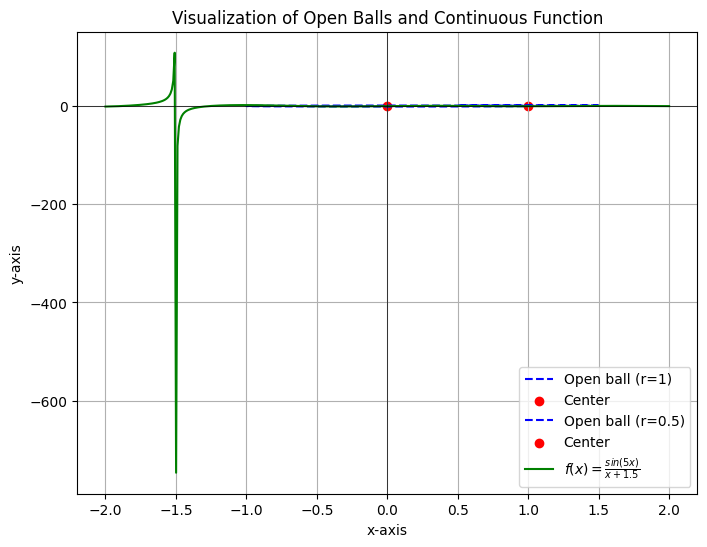

In [3]:
# Generate a 2D Euclidean distance ball
def plot_open_ball(center, radius):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)
    plt.plot(x, y, 'b--', label=f"Open ball (r={radius})")
    plt.scatter(center[0], center[1], color='red', label='Center')

# Continuous function with limit
def plot_continuous_function():
    x = np.linspace(-2, 2, 400)
    y = np.sin(5 * x) / (x + 1.5)
    plt.plot(x, y, label='$f(x) = \\frac{sin(5x)}{x + 1.5}$', color='green')

plt.figure(figsize=(8, 6))

# Plot open balls
plot_open_ball(center=[0, 0], radius=1)
plot_open_ball(center=[1, 1], radius=0.5)

# Plot
plot_continuous_function()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Visualization of Open Balls and Continuous Function")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.grid(True)
plt.show()

###Derivatives




The derivative of a function of a real variable measures the sensitivity to change of the function value with respect to another variable.  
<br><br>
**Definition: 3.2.6**  

Let $ f: D \to \mathbb{R} $ where $ D \subset \mathbb{R} $ and let $ x_0 \in D $ be an interior point of $ D $. The derivative of $ f $ at $ x_0 $ is:

$$ f'(x_0) = \frac{df(x_0)}{dx} = \lim_{h \to 0} \frac{f(x_0 + h) - f(x_0)}{h} $$

provided the limit exists.
<br><br>
**Proposition: 3.2.7**  

Let $ f $ and $ g $ have derivatives at $ x $, and let $ \alpha $ and $ \beta $ be constants. The following results hold:

$$ \left[\alpha f(x) + \beta g(x)\right]' = \alpha f'(x) + \beta g'(x) $$

<br><br>
**Lemma: 3.2.8**  

Let $ f: D \to \mathbb{R} $ with $ D \subset \mathbb{R} $ and let $ x_0 \in D $ be an interior point of $ D $ where $ f'(x_0) $ exists. If $ f'(x_0) > 0 $, then there is an open ball $ B_\delta(x_0) \subset D $ around $ x_0 $ such that for each $ x $ in $ B_\delta(x_0) $:  

- $ f(x) > f(x_0) $ if $ x > x_0 $  
- $ f(x) < f(x_0) $ if $ x < x_0 $

If instead $ f'(x_0) < 0 $, the opposite holds.  

<br><br>
**Theorem: 3.2.9**  
*(Rolle's Theorem)*  

Let $ f: [a, b] \to \mathbb{R} $ be a continuous function and assume that its derivative exists on $ (a, b) $. If $ f(a) = f(b) $, then there is some $ c \in (a, b) $ such that:

$$ f'(c) = 0 $$

<br><br>
**Theorem: 3.2.10**  
*(Mean Value Theorem)*  

Let $ f: [a, b] \to \mathbb{R} $ be a continuous function and assume that its derivative exists on $ (a, b) $. Then there is some $ c \in (a, b) $ such that:

$$ f(b) = f(a) + (b - a)f'(c) $$

or equivalently:

$$ \frac{f(b) - f(a)}{b - a} = f'(c) $$

<br><br>
**Second Derivative**  

If $ f' $ exists in $ D $, then it is itself a function of $ x $. The second derivative at $ x_0 $, an interior point of $ D $, is:

$$ f''(x_0) = \frac{d^2f(x_0)}{dx^2} = \lim_{h \to 0} \frac{f'(x_0 + h) - f'(x_0)}{h} $$

provided the limit exists.
<br><br>
**Partial Derivatives**  

For functions of several variables, the partial derivative with respect to $ x_i $ at $ x_0 $ is:

$$ \frac{\partial f(x_0)}{\partial x_i} = \lim_{h \to 0} \frac{f(x_0 + he_i) - f(x_0)}{h} $$

provided the limit exists. If $ \frac{\partial f(x_0)}{\partial x_i} $ exists and is continuous in an open ball around $ x_0 $ for all $ i $, then we say that $ f $ is continuously differentiable at $ x_0 $.
<br><br>
**Jacobian Matrix**  

Let $ f = (f_1, \dots, f_m): D \to \mathbb{R}^m $ where $ D \subset \mathbb{R}^d $, and let $ x_0 \in D $ be an interior point where $ \frac{\partial f_j(x_0)}{\partial x_i} $ exists for all $ i, j $. The Jacobian of $ f $ at $ x_0 $ is the $ d \times m $ matrix:

$$ J_f(x_0) = \begin{pmatrix} \frac{\partial f_1(x_0)}{\partial x_1} & \dots & \frac{\partial f_1(x_0)}{\partial x_d} \\ \vdots & \ddots & \vdots \\ \frac{\partial f_m(x_0)}{\partial x_1} & \dots & \frac{\partial f_m(x_0)}{\partial x_d} \end{pmatrix} $$

For a real-valued function $ f: D \to \mathbb{R} $, the Jacobian reduces to the row vector:

$$ J_f(x_0) = \nabla f(x_0)^T $$

where:

$$ \nabla f(x_0) = \begin{pmatrix} \frac{\partial f(x_0)}{\partial x_1} \\ \vdots \\ \frac{\partial f(x_0)}{\partial x_d} \end{pmatrix} $$
<br><br>
**Theorem: 3.2.15**  
*(Chain Rule)*  

Let $ f: D_1 \to \mathbb{R}^m $ and $ g: D_2 \to \mathbb{R}^p $. Assume that $ f $ is continuously differentiable at $ x_0 $, and that $ g $ is continuously differentiable at $ f(x_0) $. Then:

$$ J_{g \circ f}(x_0) = J_g(f(x_0)) J_f(x_0) $$


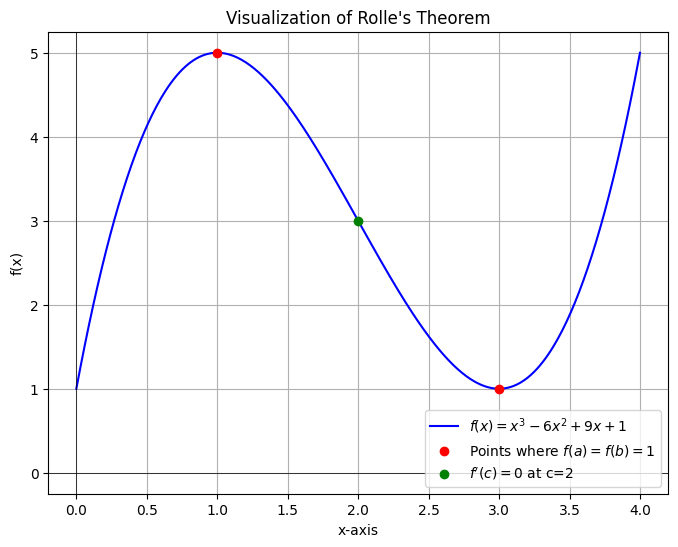

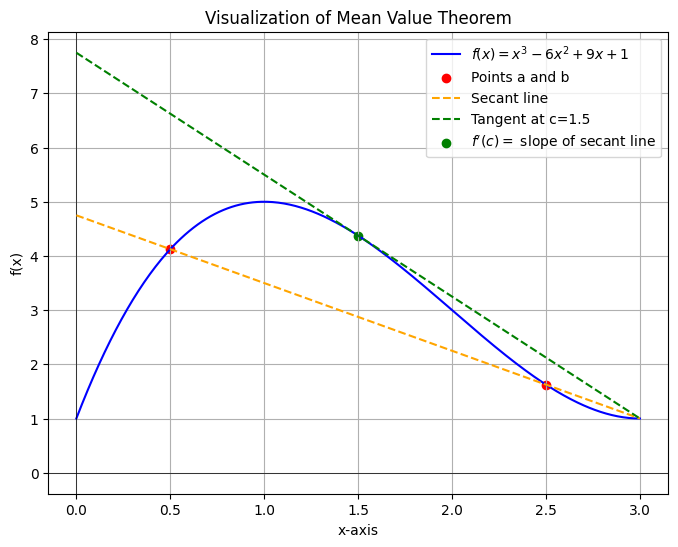

In [4]:
# Function and derivative
def f(x):
    return x**3 - 6*x**2 + 9*x + 1

def f_prime(x):
    return 3*x**2 - 12*x + 9

# Rolle's Theorem
def visualize_rolles_theorem():
    x = np.linspace(0, 4, 400)
    y = f(x)

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='$f(x) = x^3 - 6x^2 + 9x + 1$', color='blue')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)

    plt.scatter([1, 3], [f(1), f(3)], color='red', label='Points where $f(a) = f(b) = 1$', zorder=5)
    plt.scatter([2], [f(2)], color='green', label="$f'(c)=0$ at c=2", zorder=5)

    plt.title("Visualization of Rolle's Theorem")
    plt.xlabel("x-axis")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Mean Value Theorem
def visualize_mvt():
    x = np.linspace(0, 3, 400)
    y = f(x)

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='$f(x) = x^3 - 6x^2 + 9x + 1$', color='blue')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)

    a, b = 0.5, 2.5
    plt.scatter([a, b], [f(a), f(b)], color='red', label='Points a and b')

    slope_secant = (f(b) - f(a)) / (b - a)
    secant_line = slope_secant * (x - a) + f(a)
    plt.plot(x, secant_line, '--', label="Secant line", color='orange')

    c = 1.5
    tangent_line = f_prime(c) * (x - c) + f(c)
    plt.plot(x, tangent_line, '--', label="Tangent at c=1.5", color='green')
    plt.scatter([c], [f(c)], color='green', label="$f'(c)=$ slope of secant line")

    plt.title("Visualization of Mean Value Theorem")
    plt.xlabel("x-axis")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_rolles_theorem()
visualize_mvt()

###Taylor's Theorem

Taylor’s theorem gives an approximation of a differentiable function around a given point by a polynomial.  
<br><br>
**Theorem: 3.2.21 (Taylor's Theorem)**  

Let $ f: D \to \mathbb{R} $, where $ D \subset \mathbb{R} $. Suppose $ f $ has a continuous derivative $ m $ times on $ [a, b] $. Then:

$$ f(b) = f(a) + (b - a) f'(a) + \frac{(b - a)^2}{2} f''(a) + \dots + \frac{(b - a)^{m-1}}{(m - 1)!} f^{(m-1)}(a) + R_m $$

where:

$$ R_m = \frac{(b - a)^m}{m!} f^{(m)}(a + \theta(b - a)) $$

for some $ 0 < \theta < 1 $.  

In particular, for $ m = 2 $, we have:

$$ f(b) = f(a) + (b - a) f'(a) + \frac{(b - a)^2}{2} f''(\xi) $$

for some $ a < \xi < b $.  
<br><br>
**Multivariate Taylor's Theorem**  

Taylor's theorem can also be extended to multiple variables, providing polynomial approximations for functions of several variables.  
<br><br>
**Theorem: 3.2.23 (Multivariate Taylor’s Theorem)**  

Let $ f: D \to \mathbb{R} $, where $ D \subset \mathbb{R}^d $. Let $ x_0 \in D $, and let $ B_\delta(x_0) \subset D $. If $ f $ is three times continuously differentiable on $ B_\delta(x_0) $, then for any $ x \in B_\delta(x_0) $:

$$ f(x) = f(x_0) + \nabla f(x_0)^T p + \frac{1}{2} p^T H_f(x_0) p + O(\|p\|^3) $$

where $ p = x - x_0 $, and $ H_f(x_0) $ is the Hessian matrix of $ f $ at $ x_0 $.  
<br><br>
If $ f $ is twice continuously differentiable, then:

$$ f(x) = f(x_0) + \nabla f(x_0)^T p + \frac{1}{2} p^T H_f(x_0 + \xi p) p $$

for some $ 0 < \xi < 1 $.



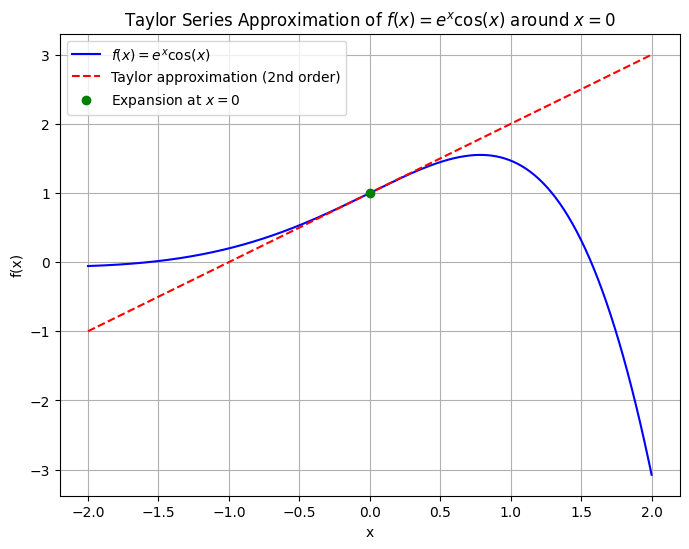

In [5]:
# Function and derivatives
def f(x):
    return np.exp(x) * np.cos(x)

def f_prime(x):
    return np.exp(x) * (np.cos(x) - np.sin(x))

def f_double_prime(x):
    return np.exp(x) * (-2 * np.sin(x))


# Taylor expansion of f(x) around x = 0
def taylor_expansion(x):
    a = 0
    return f(a) + f_prime(a) * (x - a) + 0.5 * f_double_prime(a) * (x - a)**2

# X values
x = np.linspace(-2, 2, 400)

# Y values for original function and Taylor approximation
y_original = f(x)
y_taylor = taylor_expansion(x)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x, y_original, label="$f(x) = e^x \cos(x)$", color='blue')
plt.plot(x, y_taylor, label="Taylor approximation (2nd order)", linestyle='--', color='red')

plt.scatter([0], [f(0)], color='green', label="Expansion at $x=0$", zorder=5)

plt.title("Taylor Series Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
